## II - Data Preprocessing



In some datasets, there are missing values, outliers, and categorical variables. These issues can affect the performance of the model. Therefore, it is important to preprocess the data before training the model. In this notebook, we will preprocess the data by filling the missing values, encoding the categorical variables, and scaling the features.

### II.1 Importing the Libraries and Loading the Data

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

awards_players = pd.read_csv('../data/basketballPlayoffs/awards_players.csv')
coaches = pd.read_csv('../data/basketballPlayoffs/coaches.csv')
players = pd.read_csv('../data/basketballPlayoffs/players.csv')
players_teams = pd.read_csv('../data/basketballPlayoffs/players_teams.csv')
series_post = pd.read_csv('../data/basketballPlayoffs/series_post.csv')
teams = pd.read_csv('../data/basketballPlayoffs/teams.csv')
teams_post = pd.read_csv('../data/basketballPlayoffs/teams_post.csv')

### II.2 Maping the Categorical Variables

In [310]:
map_teams = {
    'ATL': 0, 'CHA': 1, 'CHI': 2, 'CLE': 3, 'CON': 4, 
    'DET': 5, 'HOU': 6, 'IND': 7, 'LAS': 8, 'MIA': 9, 
    'MIN': 10, 'NYL': 11, 'ORL': 12, 'PHO': 13, 'POR': 14, 
    'SAC': 15, 'SAS': 16, 'SEA': 17, 'UTA': 18, 'WAS': 19
}

map_teams_name = {
    'Atlanta Dream': 0, 'Charlotte Sting': 1, 'Chicago Sky': 2, 
    'Cleveland Rockers': 3, 'Connecticut Sun': 4, 'Detroit Shock': 5, 
    'Houston Comets': 6, 'Indiana Fever': 7, 'Los Angeles Sparks': 8, 
    'Miami Sol': 9, 'Minnesota Lynx': 10, 'New York Liberty': 11, 
    'Orlando Miracle': 12, 'Phoenix Mercury': 13, 'Portland Fire': 14, 
    'Sacramento Monarchs': 15, 'San Antonio Silver Stars': 16, 
    'Seattle Storm': 17, 'Utah Starzz': 18, 'Washington Mystics': 19
}

map_arenas = {
    'Philips Arena': 0, 'Charlotte Coliseum': 1, 'Time Warner Cable Arena': 2, 
    'UIC Pavilion': 3, 'Quicken Loans Arena': 4, 'Mohegan Sun Arena': 5, 
    'The Palace of Auburn Hills': 6, 'Compaq Center': 7, 'Toyota Center': 8, 
    'Conseco Fieldhouse': 9, 'Staples Center': 10, 'AmericanAirlines Arena': 11, 
    'Target Center': 12, 'Madison Square Garden (IV)': 13, 'Amway Arena': 14, 
    'US Airways Center': 15, 'Rose Garden Arena': 16, 'ARCO Arena (II)': 17, 
    'AT&T Center': 18, 'KeyArena at Seattle Center': 19, 
    'EnergySolutions Arena': 20, 'Verizon Center': 21
}

map_awards = {
    'All-Star Game Most Valuable Player': 0,
    'Coach of the Year': 1,
    'Defensive Player of the Year': 2,
    'Kim Perrot Sportsmanship Award': 3,
    'Kim Perrot Sportsmanship': 3,
    'Most Improved Player': 4,
    'Most Valuable Player': 5,
    'Rookie of the Year': 6,
    'Sixth Woman of the Year': 7,
    'WNBA Finals Most Valuable Player': 8,
    'WNBA All-Decade Team': 9,
    'WNBA All Decade Team Honorable Mention': 10
}

### II.3 Plot Functions
Define plot functions to visualize the data.

In [311]:
def plot_missing_values(df, title):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  
    
    if len(missing_values) > 0:
        plt.figure(figsize=(10, 6))
        missing_values.plot(kind='bar')
        plt.title(f'Missing Values in {title}')
        plt.ylabel('Number of Missing Values')
        plt.xlabel('Columns')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f'No missing values in {title}')

### III.1 Players Data Preprocessing


The Players dataset needs further preprocessing, including dealing with missing values, correcting invalid data, and converting player positions into numerical values.

In [312]:
players['birthDate'] = pd.to_datetime(players['birthDate'], errors='coerce')

players['pos'] = players['pos'].replace({'G-C': 'C-G', 'F-G': 'G-F'})

positions = players['pos'].unique()
map_positions = {pos: i for i, pos in enumerate(positions)}

players['pos'] = players['pos'].map(map_positions)

Drop the columns that are not needed for the analysis.

In [313]:
players_cleaned = players[players['deathDate'] == '0000-00-00'].drop(columns=['deathDate','firstseason','lastseason'])

Check for missing values in the datasets.

In [314]:
print("\nMissing Values in Players:")
print(players_cleaned.isnull().sum())


Missing Values in Players:
bioID             0
pos               0
height            0
weight            0
college         166
collegeOther    878
birthDate        84
dtype: int64


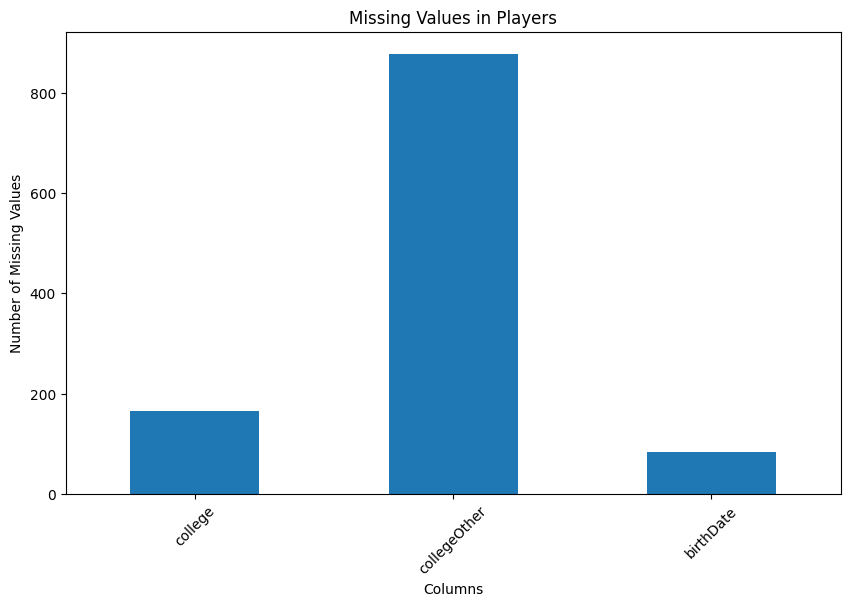

In [315]:
plot_missing_values(players_cleaned, 'Players')

### III.2 Coaches Data Preprocessing
In the **Coaches** dataset, we apply a similar mapping to team IDs.

In [316]:
coaches['tmID'] = coaches['tmID'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [317]:
coaches_cleaned = coaches.drop(columns=['lgID'])

Check for missing values in the datasets.

In [318]:
print("\nMissing Values in Coaches:")
print(coaches_cleaned.isnull().sum())


Missing Values in Coaches:
coachID        0
year           0
tmID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64


### III.3 Teams Data Preprocessing

In the **Teams** dataset, we will map some values (like team names and playoff outcomes) to numerical representations.

In [319]:
pd.set_option('future.no_silent_downcasting', True)

# Função para substituir valores
def replace_values(df, column, old_values, new_values):
    return df[column].replace(dict(zip(old_values, new_values)))

# Aplicando as correções ao DataFrame 'teams'
teams['firstRound'] = replace_values(teams, 'firstRound', ['L', 'W'], [0, 1])
teams['semis'] = replace_values(teams, 'semis', ['L', 'W'], [0, 1])
teams['finals'] = replace_values(teams, 'finals', ['L', 'W'], [0, 1])
teams['playoff'] = replace_values(teams, 'playoff', ['N', 'Y'], [0, 1])
teams['confID'] = replace_values(teams, 'confID', ['EA', 'WE'], [0, 1])
teams['tmID'] = teams['tmID'].replace(map_teams)
teams['franchID'] = teams['franchID'].replace(map_teams)
teams['name'] = teams['name'].replace(map_teams_name)
teams['arena'] = teams['arena'].replace(map_arenas)

Drop the columns that are not needed for the analysis.

In [320]:
teams_cleaned = teams.drop(columns=['lgID'])

Check for missing values in the datasets.

In [321]:
print("\nMissing Values in Teams:")
print(teams_cleaned.isnull().sum())


Missing Values in Teams:
year            0
tmID            0
franchID        0
confID          0
divID         142
rank            0
playoff         0
seeded          0
firstRound     62
semis         104
finals        122
name            0
o_fgm           0
o_fga           0
o_ftm           0
o_fta           0
o_3pm           0
o_3pa           0
o_oreb          0
o_dreb          0
o_reb           0
o_asts          0
o_pf            0
o_stl           0
o_to            0
o_blk           0
o_pts           0
d_fgm           0
d_fga           0
d_ftm           0
d_fta           0
d_3pm           0
d_3pa           0
d_oreb          0
d_dreb          0
d_reb           0
d_asts          0
d_pf            0
d_stl           0
d_to            0
d_blk           0
d_pts           0
tmORB           0
tmDRB           0
tmTRB           0
opptmORB        0
opptmDRB        0
opptmTRB        0
won             0
lost            0
GP              0
homeW           0
homeL           0
awayW           0
aw

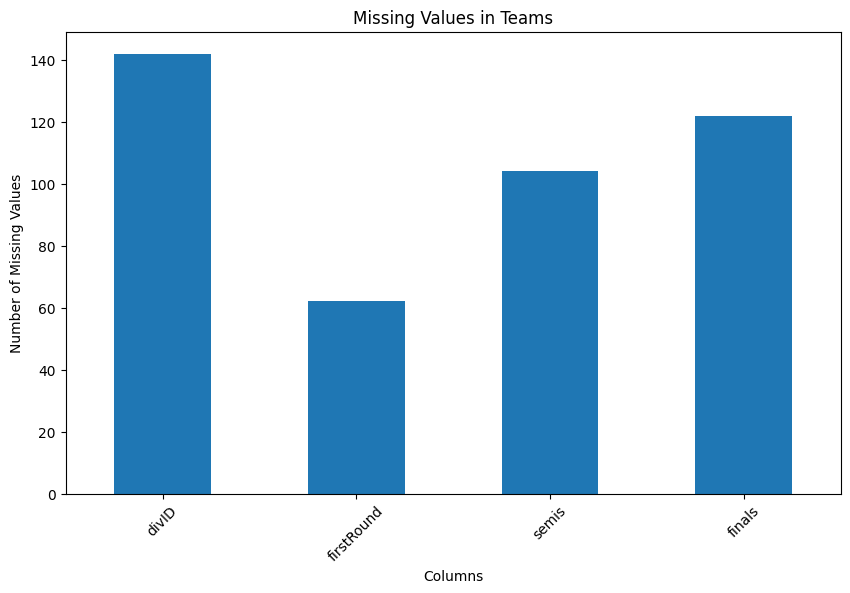

In [322]:
plot_missing_values(teams_cleaned, 'Teams')


### III.4 Players Teams Data Preprocessing

In the **Players Teams** dataset, we will map some values (like team names) to numerical representations.

In [323]:
players_teams['tmID'] = players_teams['tmID'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [325]:
players_teams_cleaned = players_teams.drop(columns=['lgID'])

Check for missing values in the datasets.

In [326]:
print("\nMissing Values in Players Teams:")
print(players_teams_cleaned.isnull().sum())


Missing Values in Players Teams:
playerID              0
year                  0
stint                 0
tmID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted           0
fgMade                0
ftAttempted           0
ftMade                0
threeAttempted        0
threeMade             0
dq                    0
PostGP                0
PostGS                0
PostMinutes           0
PostPoints            0
PostoRebounds         0
PostdRebounds         0
PostRebounds          0
PostAssists           0
PostSteals            0
PostBlocks            0
PostTurnovers         0
PostPF                0
PostfgAttempted       0
PostfgMade            0
PostftAttempted       0
PostftMade            0
PostthreeAttempted    0
Postth

### III.5 Player Awards Data Preprocessing

In the **Awards Players** dataset, we will map some values (like team names) to numerical representations.

In [327]:
awards_players['award'].replace(map_awards, inplace=True)

/var/folders/vd/66fqscc50wb104gn9yq_phl00000gn/T/ipykernel_1427/3746751018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  awards_players['award'].replace(map_awards, inplace=True)


Drop the columns that are not needed for the analysis.

In [328]:
awards_players_cleaned = awards_players.drop(columns=['lgID'])

Check for missing values in the dataset.

In [329]:
print("Missing Values in Awards Players:")
print(awards_players_cleaned.isnull().sum())

Missing Values in Awards Players:
playerID    0
award       0
year        0
dtype: int64


### III.6 Series Post Data Preprocessing
In the **Series Post** dataset, we will map some values (like playoff outcomes) to numerical representations.

In [330]:
series_post['tmIDWinner'] = series_post['tmIDWinner'].map(map_teams)
series_post['tmIDLoser'] = series_post['tmIDLoser'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [331]:
series_post_cleaned = series_post.drop(columns=['lgIDWinner','lgIDLoser'])

Check for missing values in the datasets.

In [332]:
print("\nMissing Values in Series Post:")
print(series_post_cleaned.isnull().sum())


Missing Values in Series Post:
year          0
round         0
series        0
tmIDWinner    0
tmIDLoser     0
W             0
L             0
dtype: int64


### III.7 Teams Post Data Preprocessing
In the **Teams Post** dataset, we will map some values (like playoff outcomes) to numerical representations.

In [333]:
teams_post['tmID'] = teams_post['tmID'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [334]:
teams_post_cleaned = teams_post.drop(columns=['lgID'])

Check for missing values in the datasets.

In [335]:
print("\nMissing Values in Teams Post:")
print(teams_post_cleaned.isnull().sum())


Missing Values in Teams Post:
year    0
tmID    0
W       0
L       0
dtype: int64


### Creating Output Directory

In [336]:
os.makedirs('../data/basketballPlayoffs_cleaned', exist_ok=True)

### Exporting Cleaned DataFrames to new CSV files

In [337]:
awards_players_cleaned.to_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv', index=False)
coaches_cleaned.to_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv', index=False)
players_teams_cleaned.to_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv', index=False)
players_cleaned.to_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv', index=False)
series_post_cleaned.to_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv', index=False)
teams_post_cleaned.to_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv', index=False)
teams_cleaned.to_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv', index=False)